## Import packages

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from datetime import datetime
import calendar
from pathlib import Path
parent_dir = Path.cwd().parent.parent.parent

"""
This code is used for Fig1.B. The comparative analysis of the number of chargers per station.  
Data: (1) U.S. Boundaries, (2) Summarized data of the number of chargers per station.
"""

'\nThis code is used for Fig1.B. The comparative analysis of the number of chargers per station.  \nData: (1) U.S. Boundaries, (2) Summarized data of the number of chargers per station.\n'

## Data Processing

In [2]:
def load_and_prepare_data(parent_dir):
    """
    Load and prepare EVSE data for analysis.
    """
    # Read EVSE summary data
    evse_file = Path.cwd() / 'Fig.1.B_ACl1.csv'
    result_df_l1 = pd.read_csv(evse_file).reset_index(drop=True)

    evse_file = Path.cwd() / 'Fig.1.B_ACl2.csv'
    result_df_l2 = pd.read_csv(evse_file).reset_index(drop=True)

    evse_file = Path.cwd() / 'Fig.1.B_DC.csv'
    result_df_dc = pd.read_csv(evse_file).reset_index(drop=True)
    
    return result_df_l1, result_df_l2, result_df_dc

## Mapping and Visualization

In [3]:
def plot_evse_boxplot(data, box_color="teal"):
    """
    Create a boxplot visualization for EVSE count distribution by year.
    
    Parameters:
    -----------
    data : DataFrame
        Data containing 'Year' and 'EVSE_Count' columns
    box_color : str, default "teal"
        Color for the boxplot elements
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The generated boxplot figure
    ax : matplotlib.axes.Axes
        The axes object containing the plot
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.lines import Line2D
    
    # Set visualization style
    sns.set_theme(style="whitegrid", font_scale=1.1)
    fig, ax = plt.subplots(figsize=(11, 4))
    
    # Create boxplot
    sns.boxplot(
        x='Year',
        y='EVSE_Count',
        data=data,
        color=box_color,
        width=0.7,
        linewidth=1.5,
        fliersize=4,
        showmeans=True,
        meanprops={
            'marker': 'D',
            'markerfacecolor': 'white',
            'markeredgecolor': 'Orange',
            'markersize': 8
        },
        medianprops={
            'color': 'Orange',
            'linewidth': 2,
            'linestyle': '--'
        },
        ax=ax
    )
    
    # Create legend elements
    legend_elements = [
        Line2D([0], [0], color='orange', linestyle='--', lw=2, label='Median'),
        Line2D([0], [0], marker='D', color='w', label='Mean',
               markerfacecolor='white', markeredgecolor='orange', markersize=8)
    ]
    
    # Set axis labels with bold formatting
    ax.set_xlabel(r'$\bf{Year}$', fontsize=25, labelpad=8)
    ax.set_ylabel(r'$\bf{Chargers\ per\ station}$', fontsize=0, labelpad=8)
    
    # Configure ticks and limits
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=25)
    ax.set_ylim(0, 8)
    ax.tick_params(axis='y', labelsize=25)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.4, axis='y')
    
    plt.tight_layout()
    return fig, ax

Boxplot created with 49757 data points
Years displayed: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
EVSE count range: 1.0 - 84.0


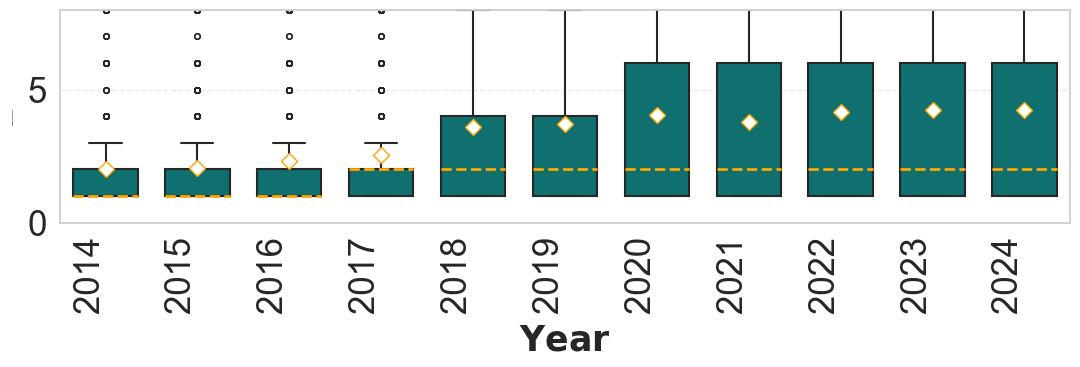

Boxplot created with 310928 data points
Years displayed: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
EVSE count range: 1.0 - 260.0


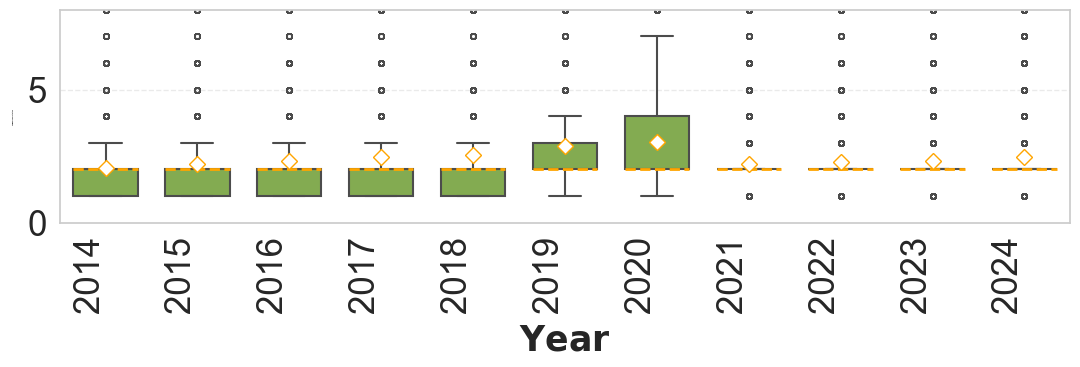

Boxplot created with 9617 data points
Years displayed: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
EVSE count range: 1.0 - 67.0


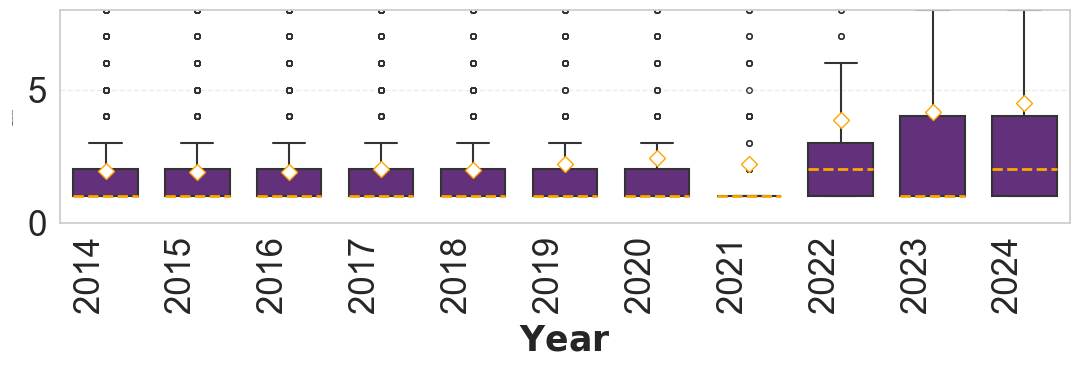

In [4]:
if __name__ == "__main__":

    # import data 
    result_df_l1, result_df_l2, result_df_dc = load_and_prepare_data(parent_dir)
    
    # DC
    fig, ax = plot_evse_boxplot(data=result_df_dc, box_color="teal")
    plt.show()

    # AC L2
    fig, ax = plot_evse_boxplot(data=result_df_l2, box_color="#84BA42")
    plt.show()

    # AC L1
    fig, ax = plot_evse_boxplot(data=result_df_l1, box_color="#682487")
    plt.show()